# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Syahrial Rizky]
- **Email:** [m296b4ky4250@bangkit.academy]
- **ID Dicoding:** [syahrial_rizky]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana penyewaan sepeda di weekday,workingday, dan holiday?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana perbandingan penyewaan sepeda di tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

**Load data day.csv**

In [2]:
df_day = pd.read_csv("data/day.csv")
df_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Load data hour.csv**

In [3]:
df_hour = pd.read_csv('data/hour.csv')
df_hour.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

1. Cek tipedata pada dataframe day

In [4]:
# Cek tipedata
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Cek apakah ada missing values pada dataframe day

In [5]:
# Cek missing values
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

3. Cek apakah ada duplikasi data pada dataframe day dan hour

In [6]:
# Cek Duplikasi Data day.csv
print("Data duplikat day: ", df_day.duplicated().sum())

Data duplikat day:  0


In [7]:
# Cek Duplikasi Data hour.csv
print("Data duplikat hour: ", df_hour.duplicated().sum())

Data duplikat hour:  0


4. Describe dataframe hour dan day untuk melihat apakah ada keanehan

In [8]:
# Describing Data in dataframes (cek keanehan data dalam dataframe)
print("Data describe day:", df_day.describe())
print("Data describe hour:", df_hour.describe())

Data describe day:           instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std     

Kita simpulkan berdasarkan data diatas berarti bahwa datanya aman dan tidak ada keanehan

### Cleaning Data

**Menghapus beberapa elemen yang tidak diperlukan dalam proses analisis**

- Menghapus dataframe hour karena pada proses analisis kita saat ini tidak akan menggunakan elemen ini

In [9]:
# Cleaning Data
# Mengahpus tabel dataframe hour karena tidak gunakan pada proyek analisis kita
del df_hour

- Menghapus beberapa kolom di dataframe day yang tidak digunakan

In [10]:
# Hapus beberapa kolom yang tidak digunakan
df_day.drop(columns=['instant', 'windspeed'],errors= 'ignore', inplace=True)
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


Disini kita menghapus atribut instant dan windspeed dalam dataframe day karena tidak dibutuhkan pada proses analisis kami

- Mengubah beberapa nama atribut dalam dataframe day

In [11]:
# Ubah beberapa atribut dalam dataframe
df_day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

df_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


Mengubah nama atribut
dteday menjadi dateday,
yr menjadi year,
mnth menjadi month,
weathersit menjadi weather_condition,
cnt menjadi count


- Merepresentasikan angka sebagai value teks (Mapping data)

In [12]:
# Data Mapping untuk atribut bernilai number kedalam teks
# Dictionary mapping for multiple columns
mapping_data = {
    'month': {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    },
    'season': {
        1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    },
    'weekday': {
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    },
    'weather_condition': {
        1: 'Sunny',
        2: 'Cloudy',
        3: 'Rainy',
        4: 'Windy'
    }
}

# Apply the mapping to the respective columns
for col, data in mapping_data.items():
    df_day[col] = df_day[col].map(data)



- Mengubah tipe data pada dateday menjadi datetime
- Mengubah tipe data pada dataframe day menjadi categorical

In [13]:
# Ubah tipe data dateday menjadi datetime
df_day['dateday'] = pd.to_datetime(df_day.dateday)

# Mengubah tipe data bebearapa atribut ke categorical
df_day['season'] = df_day.season.astype('category')
df_day['year'] = df_day.year.astype('category')
df_day['month'] = df_day.month.astype('category')
df_day['holiday'] = df_day.holiday.astype('category')
df_day['weekday'] = df_day.weekday.astype('category')
df_day['workingday'] = df_day.workingday.astype('category')
df_day['weather_condition'] = df_day.weather_condition.astype('category')

df_day.head()


,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Sunny,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Sunny,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Sunny,0.226957,0.229270,0.436957,82,1518,1600


In [14]:
# Show datatypes
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_condition  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  hum                731 non-null    float64       
 11  casual             731 non-null    int64         
 12  registered         731 non-null    int64         
 13  count              731 non-null    int64         
dtypes: categor

## Exploratory Data Analysis (EDA)

### Explore ...

- Grouping penyewa sepeda kategori casual dan registered berdasarkan atribut bulan

In [15]:
# Exploratory Data Analysis

# data day exploration (Pengelompokan data)
# Grouping penyewa sepeda kategori casual dan registered berdasarkan atribut bulan

df_day.groupby(by='month', observed=False).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

- Grouping penyewa sepeda berdasarkan atribut cuaca

In [16]:
# Grouping penyewa sepeda berdasarkan atribut cuaca
df_day.groupby(by='weather_condition', observed=False).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                    max  min         mean      sum
weather_condition                                 
Cloudy             8362  605  4035.862348   996858
Rainy              4639   22  1803.285714    37869
Sunny              8714  431  4876.786177  2257952

- Grouping penyewa sepeda berdasarkan atribut holiday

In [17]:
# Grouping penyewa sepeda berdasarkan atribut holiday
df_day.groupby(by='holiday', observed=False).agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

- Grouping penyewa sepeda berdasarkan atribut weekday

In [18]:
# Grouping penyewa sepeda berdasarkan atribut weekday
df_day.groupby(by='weekday', observed=False).agg({
    'count': ['max', 'min', 'mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

- Grouping penyewa sepeda berdasarkan atribut workingday

In [19]:
# Grouping penyewa sepeda berdasarkan atribut workingday
df_day.groupby(by='workingday', observed=False).agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

- Grouping penyewa sepeda berdasarkan atribut season

In [20]:
# Grouping penyewa sepeda berdasarkan atribut season
df_day.groupby(by='season', observed=False).agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

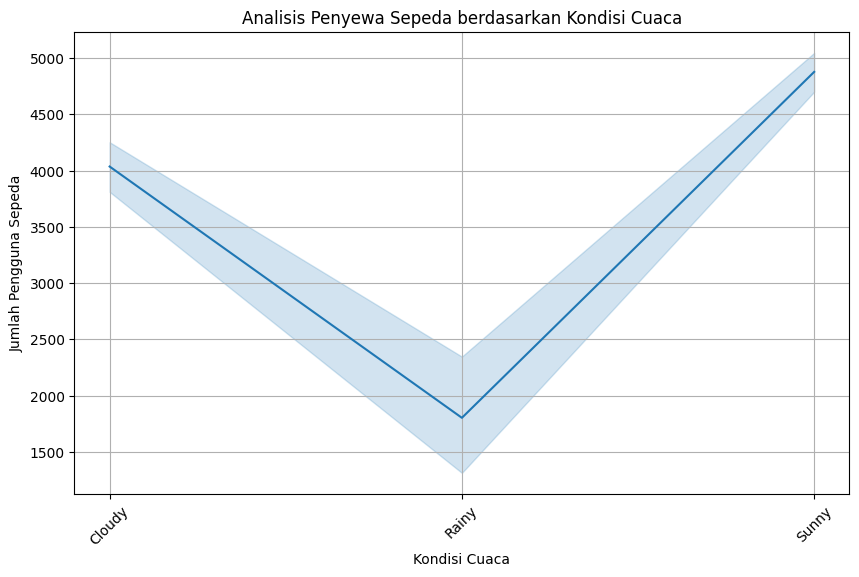

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(
    x='weather_condition',
    y='count',
    data=df_day
)

plt.title('Analisis Penyewa Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana penyewaan sepeda di weekday,workingday, dan holiday?

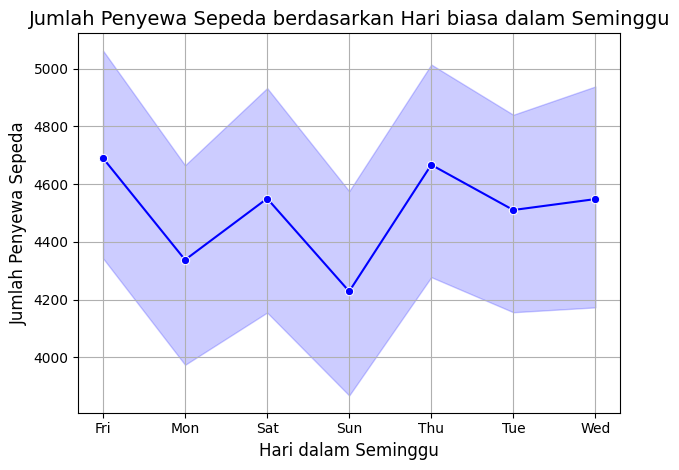

In [22]:
# Analisis Jumlah Penyewa sepeda berdasarkan hari kerja (workingday), Hari biasa (weekday), dan Hari libur (Holiday)

# Berdasarkan hari biasa (weekday)
plt.figure()
sns.lineplot(
  x='weekday',
  y='count',
  data=df_day,
  marker='o',
  linestyle='-',
  color='blue'
  )
plt.title('Jumlah Penyewa Sepeda berdasarkan Hari biasa dalam Seminggu', fontsize=14)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Jumlah Penyewa Sepeda', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

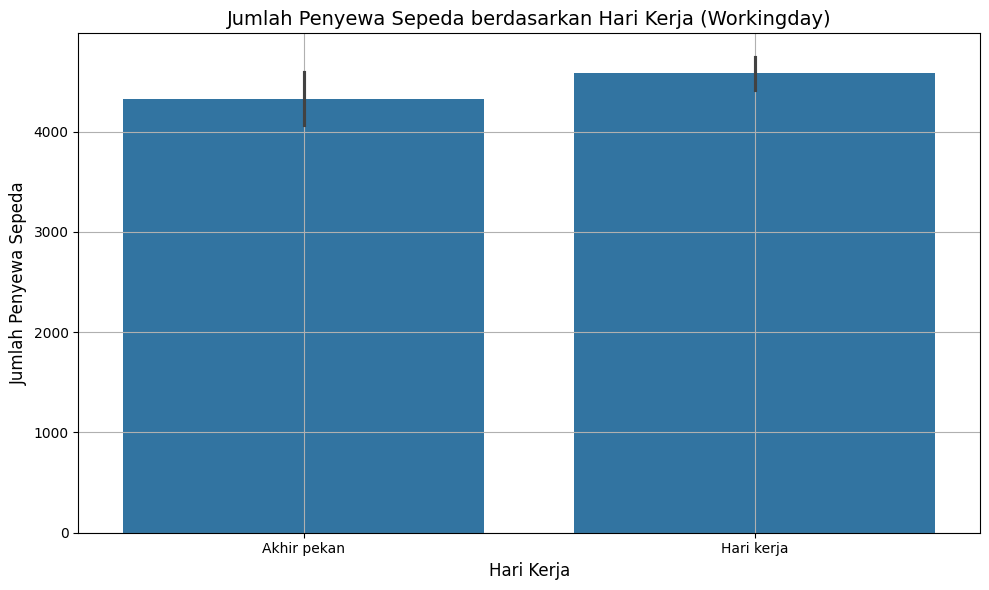

In [23]:
# Berdasarkan hari kerja (workingday)

df_day['workingday'] = df_day['workingday'].map({0:'Akhir pekan', 1:'Hari kerja'})

plt.figure(figsize=(10,6))
sns.barplot(
  x='workingday',
  y='count',
  data=df_day,

  )
plt.title('Jumlah Penyewa Sepeda berdasarkan Hari Kerja (Workingday)', fontsize=14)
plt.xlabel('Hari Kerja', fontsize=12)
plt.ylabel('Jumlah Penyewa Sepeda', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()

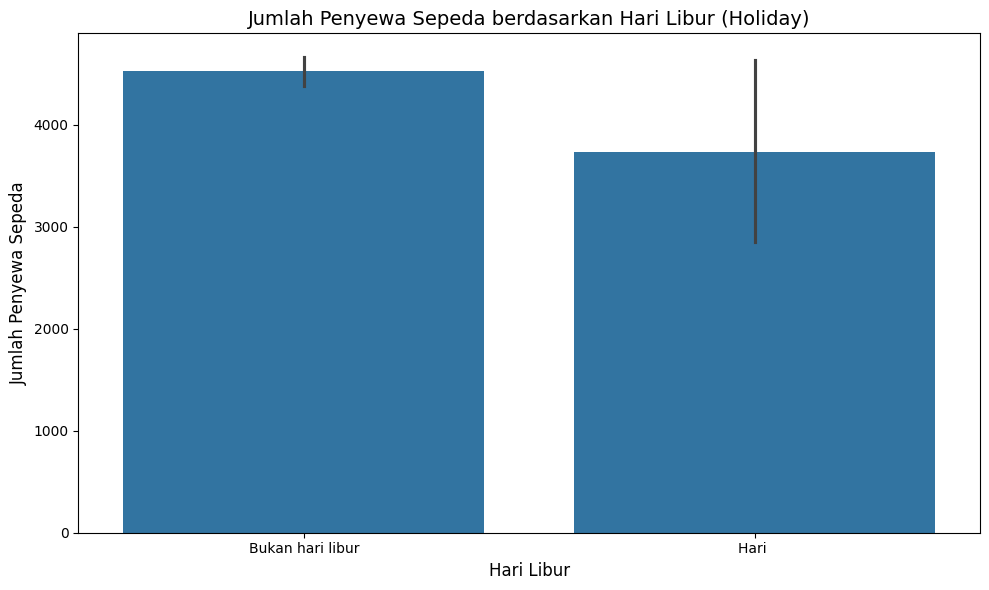

In [24]:
# Berdasarkan hari kerja (workingday)

df_day['holiday'] = df_day['holiday'].map({0:'Bukan hari libur', 1:'Hari '})

plt.figure(figsize=(10,6))
sns.barplot(
  x='holiday',
  y='count',
  data=df_day,

  )
plt.title('Jumlah Penyewa Sepeda berdasarkan Hari Libur (Holiday)', fontsize=14)
plt.xlabel('Hari Libur', fontsize=12)
plt.ylabel('Jumlah Penyewa Sepeda', fontsize=12)

plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

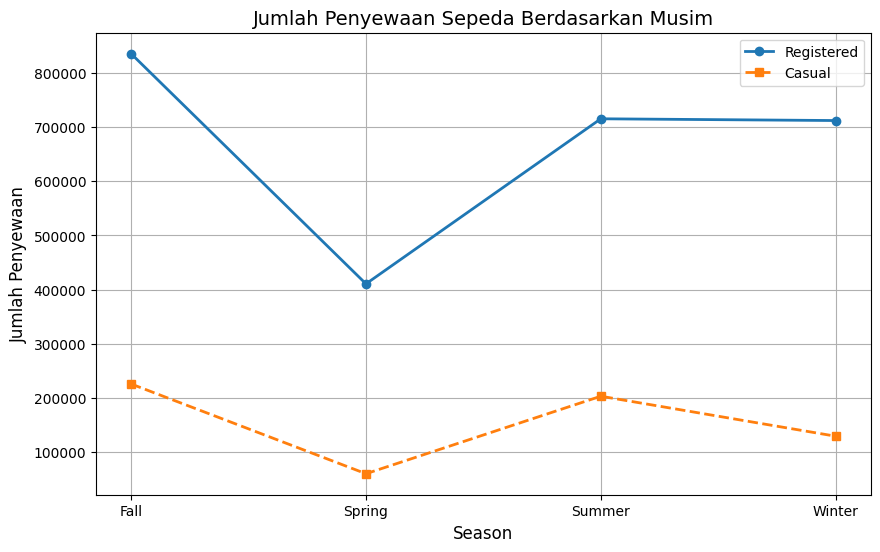

In [25]:
# Menghitung jumlah penyewaan berdasarkan musim
seasonal_usage = df_day.groupby('season', observed=False)[['registered', 'casual']].sum().reset_index()


plt.figure(figsize=(10, 6))

plt.plot(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue',
    marker='o',
    linestyle='-',
    linewidth=2
)

plt.plot(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange',
    marker='s',
    linestyle='--',
    linewidth=2
)

plt.xlabel('Season', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim', fontsize=14)

plt.grid(True)
plt.legend()
plt.show()


### Pertanyaan 4: Bagaimana perbandingan penyewaan sepeda di tahun 2011 dan 2012?

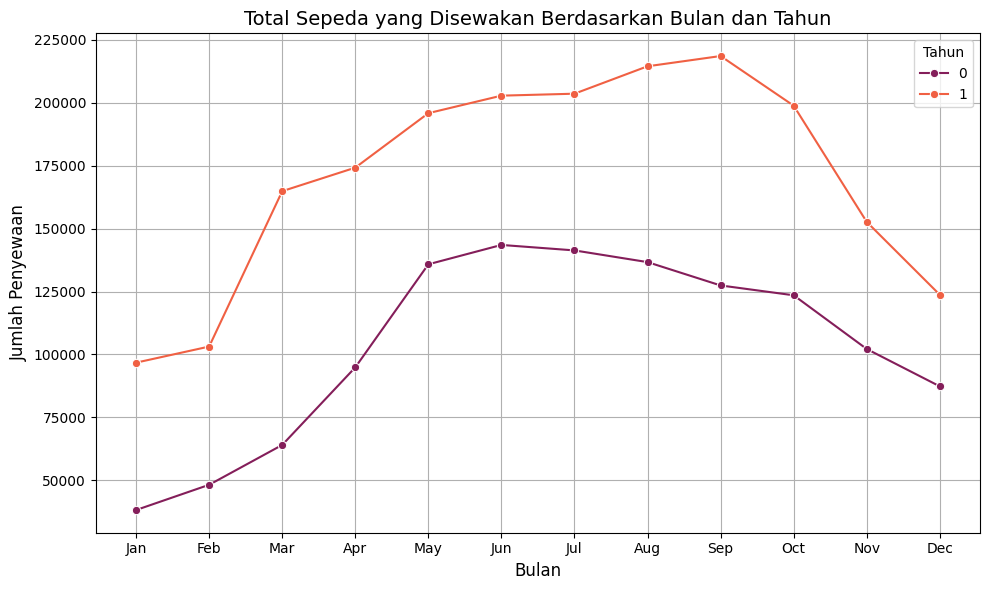

In [26]:
# Analisis perbandingan Penyewaan sepeda pada tahun 2011 dan 2012
# Mengonversi kolom 'month' menjadi kategori dengan urutan yang benar
df_day['month'] = pd.Categorical(
    df_day['month'],
    categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True
)

monthly_counts = df_day.groupby(["month", "year"], observed=False)['count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o"
)

plt.title("Total Sepeda yang Disewakan Berdasarkan Bulan dan Tahun", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.legend(title="Tahun", loc="upper right")

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## Conclusion

In [ ]:
- Conclution pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
    Jumlah penyewa sepeda tertinggi adalah saat cuaca cerah (Sunny). Semakin buruk cuaca, semakin sedikit orang yang menyewa sepeda.

In [ ]:
- Conclution pertanyaan 2 : Bagaimana penyewaan sepeda di weekday,workingday, dan holiday?
    Jumlah penyewa sepeda cenderung stabil di hari biasa (weekday), dengan sedikit peningkatan di akhir pekan.

    Terdapat sedikit perbedaan antara hari kerja (workingday) dan akhir pekan, dengan hari kerja memiliki jumlah penyewa yang sedikit lebih tinggi.

    Jumlah penyewa sepeda pada hari libur (holiday) lebih rendah dibandingkan hari biasa.

In [ ]:
- Conclution pertanyaan 3 : Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
    Jumlah penyewa sepeda paling tinggi di musim gugur (Fall) dan musim panas (Summer). Jumlah penyewa paling rendah di musim dingin (Winter).

Terdapat perbedaan yang signifikan antara jumlah pengguna terdaftar (registered) dan pengguna biasa (casual) di setiap musim. Pengguna terdaftar cenderung lebih konsisten sepanjang tahun.

In [ ]:
- Conclution pertanyaan 4 : Bagaimana perbandingan penyewaan sepeda di tahun 2011 dan 2012?	
    Secara umum, jumlah penyewaan sepeda meningkat pada tahun 2012 dibandingkan tahun 2011. Pola musiman tetap konsisten, dengan puncak di musim panas dan penurunan di musim dingin.